<a href="https://colab.research.google.com/github/sviteribuben/ML_01-ML_TRICKS/blob/main/SCIKITLEARN_tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn==0.23.0

     |████████████████████████████████| 7.3MB 2.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [68]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [3]:
X, y = load_boston(return_X_y=True)

In [4]:
model = KNeighborsRegressor()
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [5]:
pred = model.predict(X)

In [6]:
lr_model = LinearRegression()
lr_model.fit(X, y)
lr_model.predict(X)[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

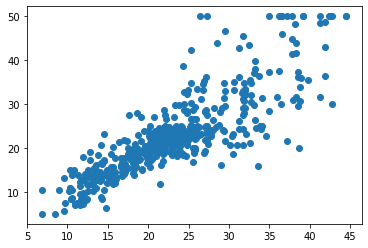

In [7]:
plt.scatter(pred, y)

In [8]:
pipe = Pipeline([
                 ('scale', StandardScaler()),
                 ('model', KNeighborsRegressor())                 
])

In [9]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

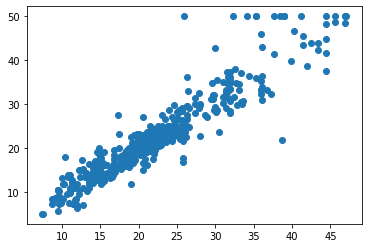

In [10]:
pred_pipe = pipe.predict(X)
plt.scatter(pred_pipe, y)

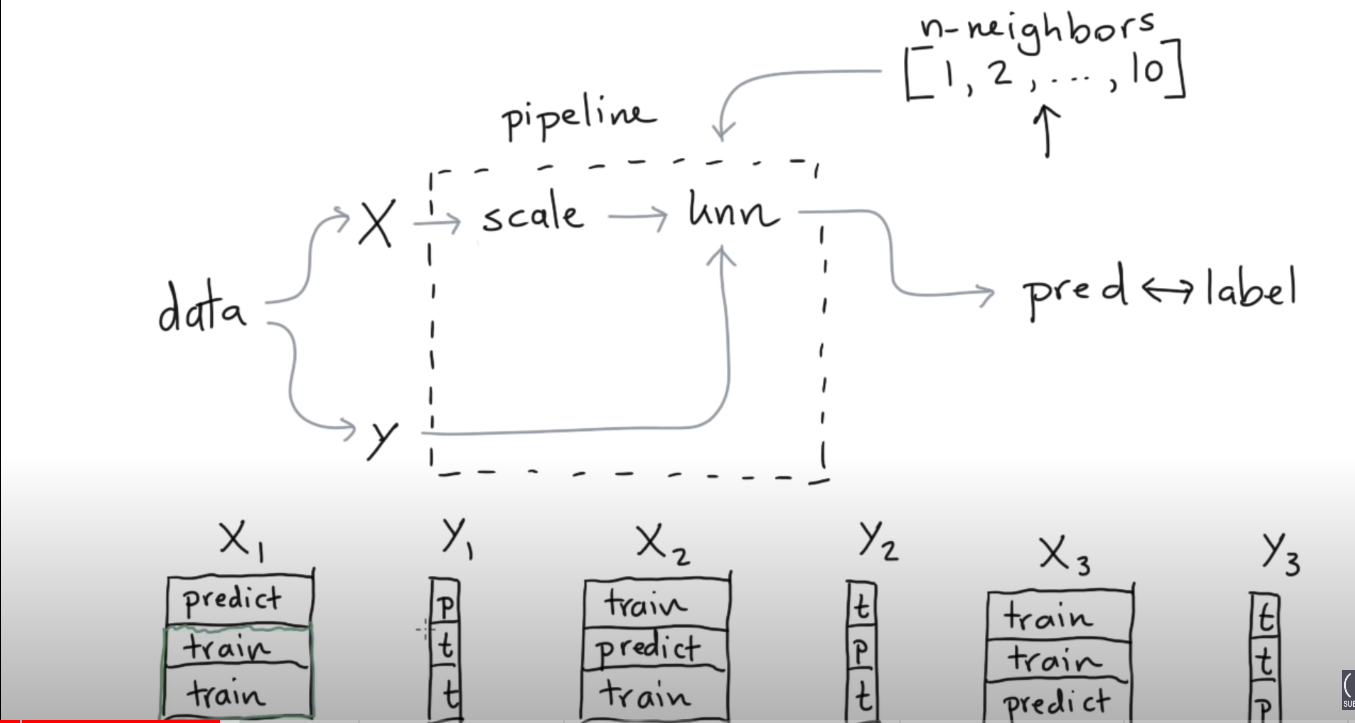

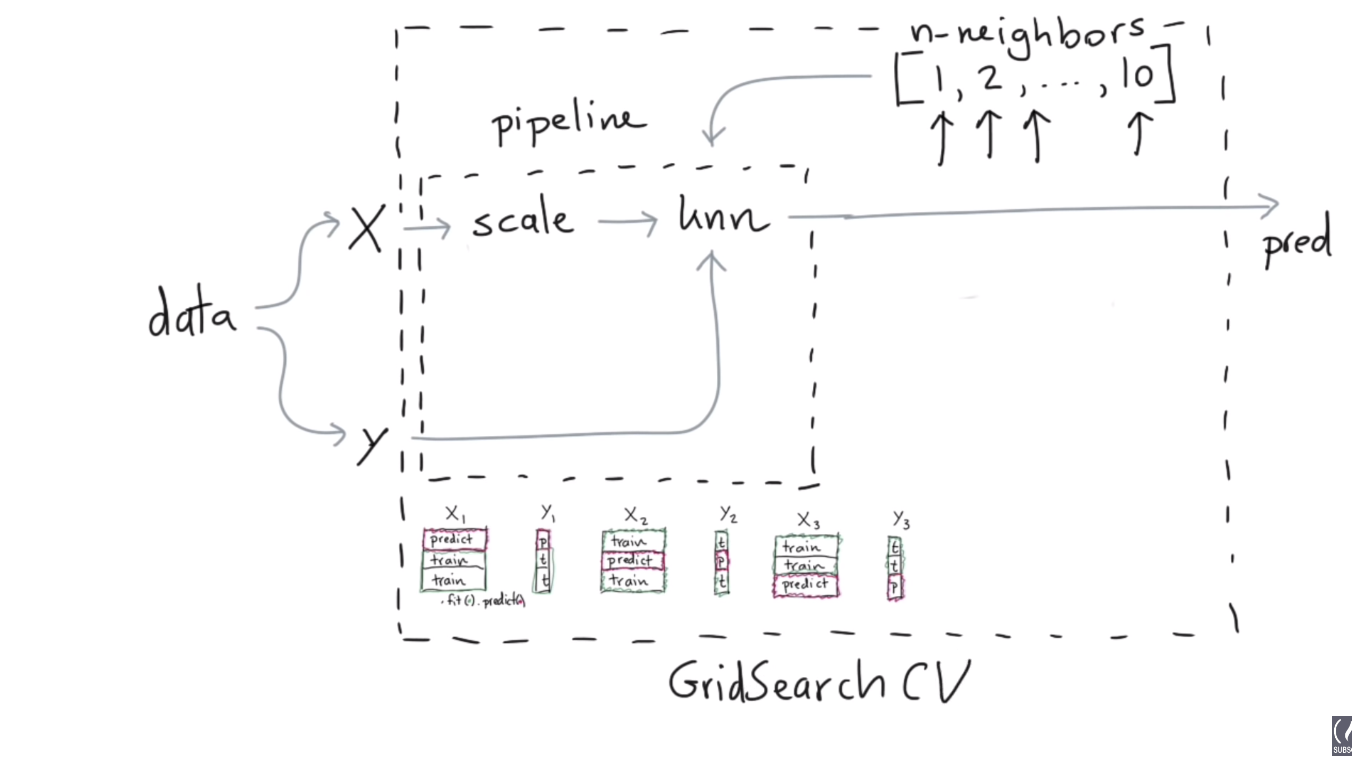

In [11]:
pipe.get_params()

{'memory': None,
 'model': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform',
 'scale': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'steps': [('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('model',
   KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform'))],
 'verbose': False}

In [12]:
# estimator - это обект который был обучен (pipline)
# param_grid  - в данном случае количество соседей
modGSCV = GridSearchCV(estimator=pipe,
                       param_grid={'model__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                       cv=3,
                       n_jobs=-1)

In [17]:
modGSCV.fit(X, y);
pd.DataFrame(modGSCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001967,0.000383,0.003427,0.001070,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001971,0.000307,0.003154,0.000736,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.002415,0.000232,0.005021,0.000905,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.002077,0.000078,0.003715,0.000237,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002062,0.000117,0.003759,0.000212,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.002045,0.000116,0.003914,0.000450,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.002047,0.000162,0.004128,0.000225,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.002027,0.000030,0.003800,0.000365,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.002138,0.000143,0.004637,0.001055,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001867,0.000362,0.003568,0.000604,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


**PREPROCESSING**

In [44]:
# data = pd.('https://github.com/koaning/calm-notebooks/blob/7697b998edd056a52328adae25733077b0b57698/scikit-prep/drawndata1.csv')
df = pd.read_html('https://github.com/koaning/calm-notebooks/blob/7697b998edd056a52328adae25733077b0b57698/scikit-prep/drawndata1.csv')
data = pd.DataFrame(df[0]).drop(['Unnamed: 0'], 1)
# data.shape,
data.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [45]:
X = data[['x', 'y']].values
y = data.z =='a'

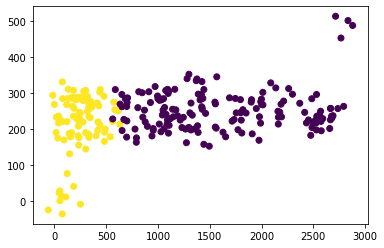

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y);

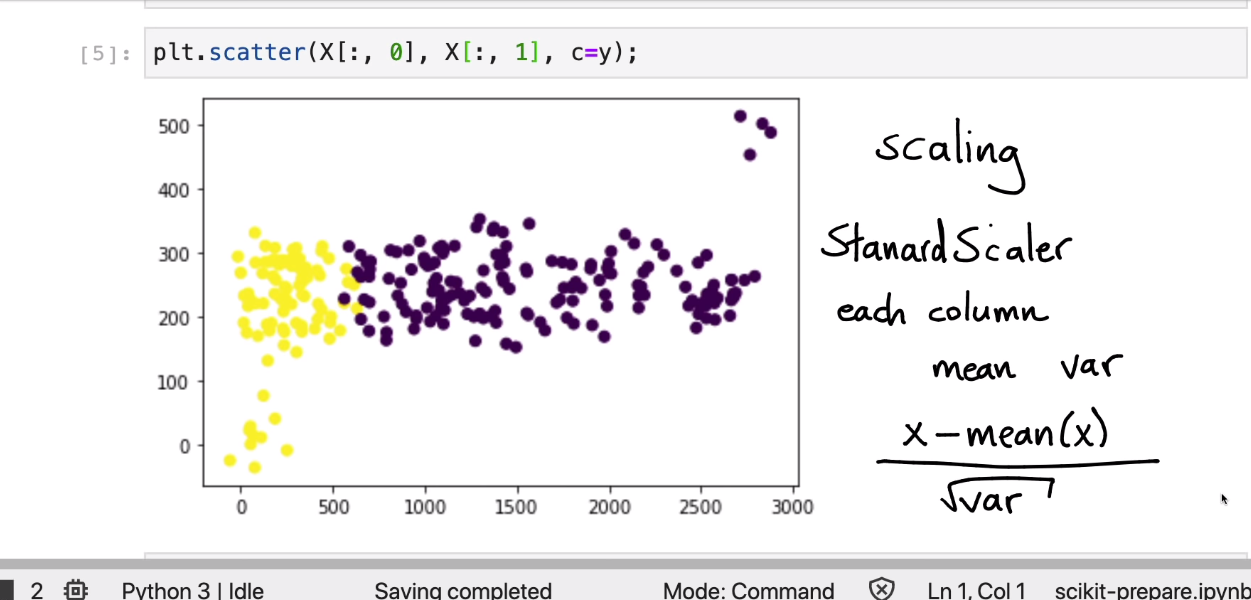

**SCALING DATA**

In [49]:
# усредняем данные около нуля c различными мин и макс
X_new = StandardScaler().fit_transform(X)

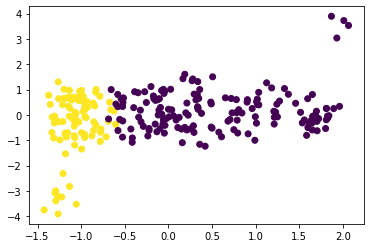

In [50]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

In [53]:
# усредняем данные от  нуля до 1
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)

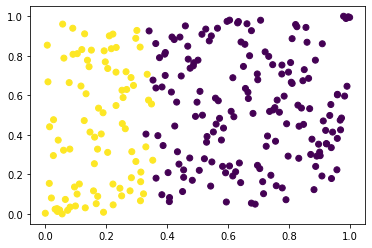

In [54]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

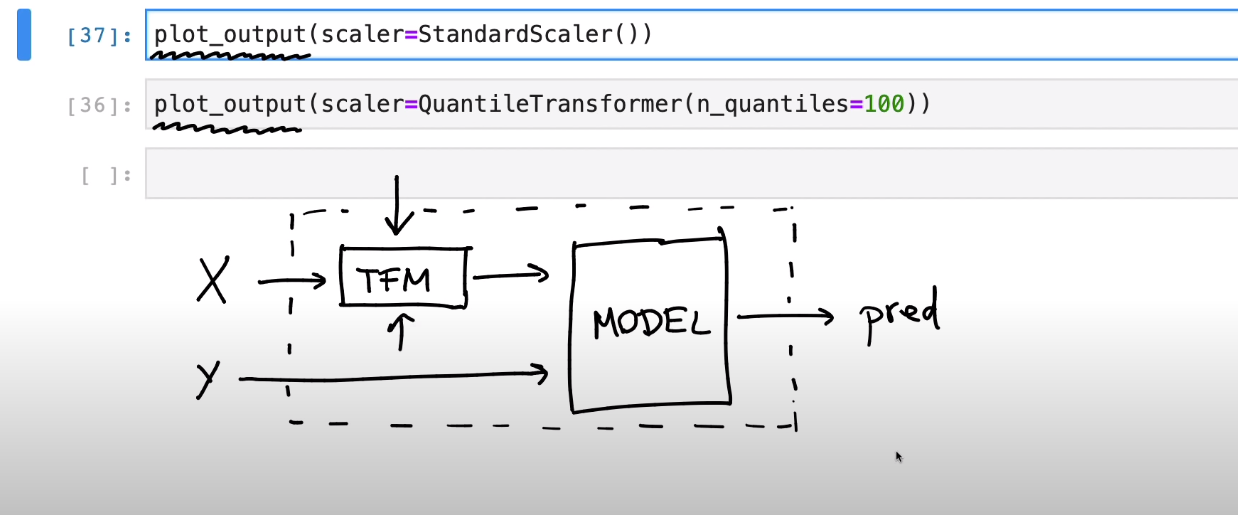

In [61]:
# Function to deal with the plotting.
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

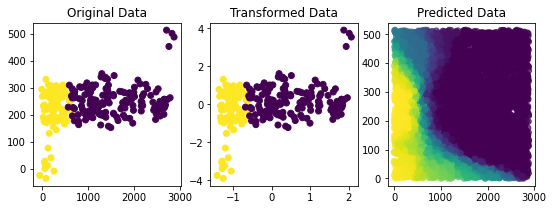

In [62]:
plot_output(scaler=StandardScaler())

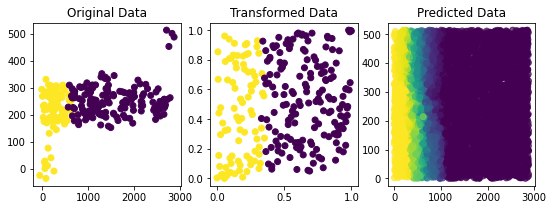

In [64]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

**NEW DATASET**

In [65]:
df = pd.read_html('https://github.com/koaning/calm-notebooks/blob/7697b998edd056a52328adae25733077b0b57698/scikit-prep/drawndata2.csv')
data = pd.DataFrame(df[0]).drop(['Unnamed: 0'], 1)
# data.shape,
data.head(3)

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a


In [66]:
X = data[['x', 'y']].values
y = data.z =='a'

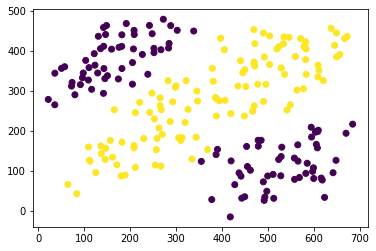

In [67]:
plt.scatter(X[:, 0], X[:, 1], c=y);

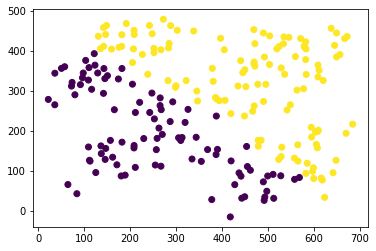

In [70]:
pipe = Pipeline([
                 ('scale', QuantileTransformer(n_quantiles=100)),
                 ('model', LogisticRegression())                 
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

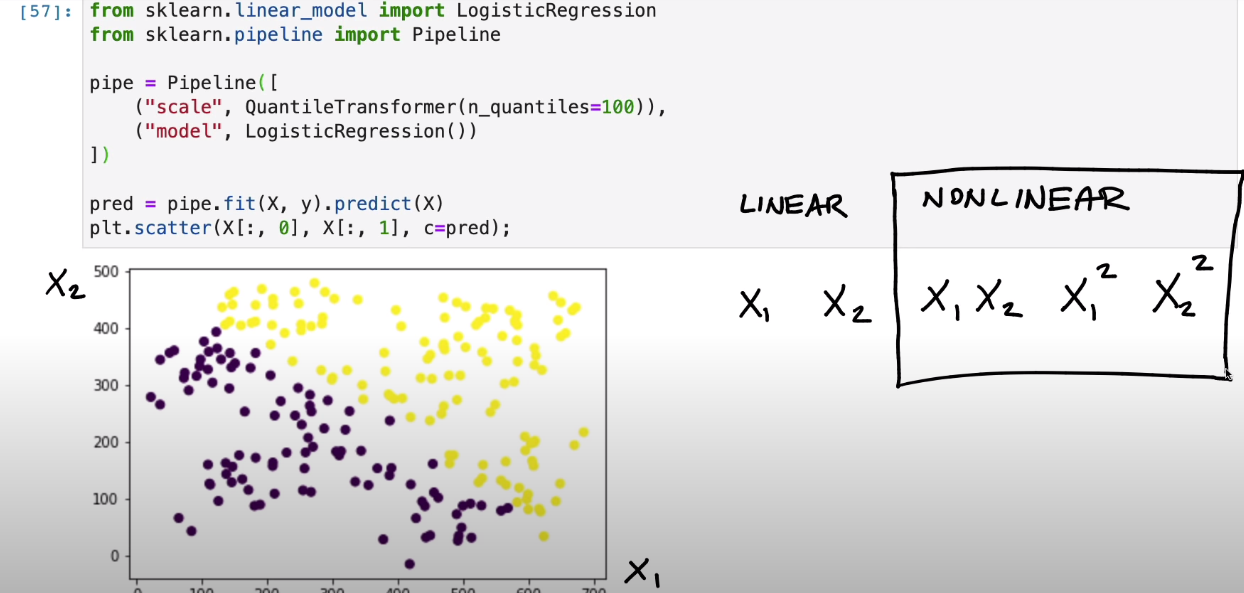

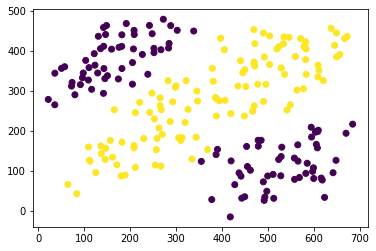

In [72]:
# ПОлиномиальные фичи
pipe = Pipeline([
                 ('scale', PolynomialFeatures()),
                 ('model', LogisticRegression())                 
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

**OHE**

In [77]:
arr = np.array(['low', 'low', 'hot', 'medium',]).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['hot'],
       ['medium']], dtype='<U6')

In [78]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [84]:
enc.transform([['zero']])

array([[0., 0., 0.]])